In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer


In [12]:
df = pd.read_csv(r'c:\Users\Admin\Documents\DataSets\Titanic-Dataset.csv',usecols=['Survived','Sex','Age','Fare'])
df.head()

,Survived,Sex,Age,Fare
0,0,male,22.0,7.2500
1,1,female,38.0,71.2833
2,1,female,26.0,7.9250
3,1,female,35.0,53.1000
4,0,male,35.0,8.0500


In [13]:
df.isnull().sum()

Survived      0
Sex           0
Age         177
Fare          0
dtype: int64

In [21]:
X_train,X_test , Y_train ,Y_test = train_test_split(df.iloc[:,1:],df.iloc[:,0],test_size=0.2 , random_state=42)

In [24]:
X_train.shape

(712, 3)

In [25]:
X_test.shape

(179, 3)

In [23]:
Y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [37]:
X_train.head(1)



,Sex,Age,Fare
331,male,45.5,28.5


In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [47]:
numeric_bin = Pipeline([
    ('impute',SimpleImputer(strategy='mean')),
    ('bin',KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile'))
])

In [60]:
trans = ColumnTransformer([
    ('sex_enc',OneHotEncoder(drop='first'),[0]),
    ('age_bin',numeric_bin,[1]),
    ('fare_bin',numeric_bin,[2]),
],remainder='drop')

In [61]:
X_train_transformed=trans.fit_transform(X_train)
X_test_transformed=trans.fit_transform(X_test)

c:\Users\Admin\Desktop\ML\.venv\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
c:\Users\Admin\Desktop\ML\.venv\Lib\site-packages\sklearn\preprocessing\_discretization.py:397: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\Admin\Desktop\ML\.venv\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_m

In [ ]:
X_train_transformed.

In [62]:
X_train_transformed=pd.DataFrame(X_train_transformed,columns=X_train.columns )

In [64]:
X_train_transformed.head()

,Sex,Age,Fare
0,1.0,7.0,7.0
1,1.0,2.0,4.0
2,1.0,6.0,2.0
3,1.0,3.0,1.0
4,0.0,0.0,7.0


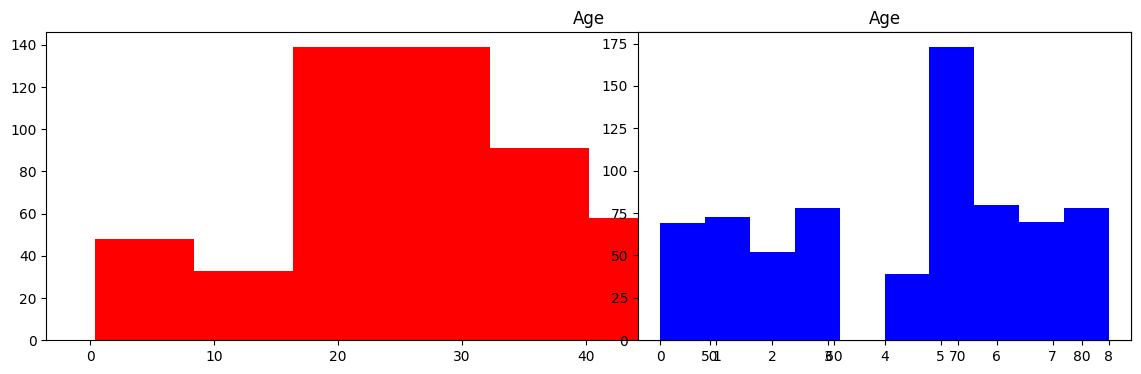

In [ ]:

plt.figure(figsize=(14,4))
plt.hist(X_train['Age'],color='red')
plt.title('Age')

plt.hist(X_train_transformed['Age'],color='blue')
plt.title('Age')
plt.show()